# Plotting the variance vs cycle life data and calculating correlation coefficient

In [24]:
#import the necessary files
import matplotlib.pyplot as plt #used for plotting the graph
import pandas as pd #used to import the data
import numpy as np
from sklearn.linear_model import LinearRegression as lr #plotting the line of best fit
from scipy.stats.stats import pearsonr #used to calculate correlation coefficient

In [25]:
variance_data = pd.read_csv('variance_data.csv') #save the variance vs cycle life data as a stored variable called variance_data

In [26]:
xlab = 'variance' 
ylab = 'cycle_life'
X = variance_data[xlab].values.reshape(-1, 1) #call the variance column as X and reshape
y = variance_data[ylab].values.reshape(-1, 1) #call the cycle life column as y and reshape

In [27]:
#since there is a log relationship between the 2 variables, it is important to take the log of both variables.
logX = np.log10(X)
logy = np.log10(y)

In [28]:
linearModel = lr()
linearModel.fit(logX, logy) #find the line of best fit for the data 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
## extracting model parameters
a = linearModel.coef_[0][0]
b = linearModel.intercept_[0]

In [30]:
# calculating the line of best fit
y_predicted = np.power(10,b)*np.power(X,a)  

In [31]:
#calculating the correlation coefficient
pearsonr_coefficient, p_value = pearsonr(logX, logy)

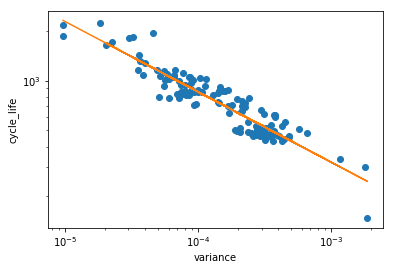

R^2 is: [-0.92731589]


In [32]:
#plotting the data
plt.loglog(variance_data[xlab], variance_data[ylab], linestyle='', marker='o')  # plotting the raw data
plt.plot(variance_data[xlab], y_predicted)  # plotting 
plt.xlabel('{}'.format(xlab))
plt.ylabel('{}'.format(ylab))
plt.show()
print(r'R^2 is: {}'.format(pearsonr_coefficient))

# Using the elastic net on the variance vs cycle life data

In [41]:
#import a few more modules
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [42]:
#used to scale the data
sc = StandardScaler()

In [43]:
xlab = 'variance' #the title of the variance column
ylab = 'cycle_life' #the title of the cycle_life column

X = variance_data[xlab].values.reshape(-1, 1) #assigns the CSV values to a variable X. 
y = variance_data[ylab].values.reshape(-1, 1) #.reshape converts to a 1 by 1 column

In [44]:
X = np.log10(X) # does the natural log of each value since there is a logarithmic relationship
y = np.log10(y) # between the 2 variables

In [45]:
#function for calculating mean percent error
def mean_absolute_percentage_error(y_true, y_pred):
    percentages = []
    for i in range(len(y_true)):
        difference = np.abs(y_true[i]-y_pred[i]) / y_true[i]
        percentages.append(difference)
    return np.mean(percentages)*100

In [46]:
#splitting the data into training, test, and secondary test
numBat1 = 41 
numBat2 = 43
numBat3 = 40
numBat = numBat1 + numBat2 + numBat3 

test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83)) #test_ind uses 43 of the 123 variables to test
train_ind = np.arange(1,(numBat1+numBat2-1),2) #train_ind uses 41 of the 123 variables to train the model
secondary_test_ind = np.arange(numBat-numBat3,numBat); #secondary test is the final test consisting of 39 variables

In [47]:
X_train = X[train_ind] #X_train = column of all the variances used to train the model
X_test = X[test_ind] #X_test = column of all the variances used to test the model
X_secondary_test = X[secondary_test_ind] #X_secondary = column of all  variances used to secondarily test the model

y_train = y[train_ind] #y_train is the cycle_life of the first 43 cells
y_test = y[test_ind] #y_test is the cycle life of the next 41 cells
y_secondary_test = y[secondary_test_ind] #y_secondary_test is the cycle life for the last 43 cells

In [48]:
#Applying elastic net using four fold cross validation
elastic_net = ElasticNetCV(cv=4, random_state=0) #initialises the elastic net
elastic_net.fit(X_train,y_train) #should create the regression. use .coef_ and .intercept
y_train_predicted = elastic_net.predict(X_train) #should create prediction of life based on X_train values
y_test_predicted = elastic_net.predict(X_test) #should create prediction of life based on X_test values
y_secondary_test_predicted = elastic_net.predict(X_secondary_test) #should create prediction of life based on X_secondary values

C:\Users\Mohammed\Documents\DE1\Computing\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
#converts log back into cycle life
y = np.power(10,y) 
y_train_predicted = np.power(10,y_train_predicted)
y_test_predicted = np.power(10,y_test_predicted)
y_secondary_test_predicted = np.power(10,y_secondary_test_predicted)

y_train = np.power(10,y_train)
y_test = np.power(10,y_test)
y_secondary_test= np.power(10,y_secondary_test)

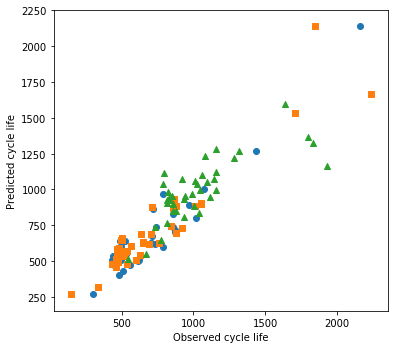

14.134027077373432
14.75028995998483
11.417312896807955


In [50]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, aspect='equal')
ax.scatter(y_train, y_train_predicted,marker ='o')
ax.scatter(y_test, y_test_predicted,marker ='s')
ax.scatter(y_secondary_test, y_secondary_test_predicted,marker ='^')
plt.xlabel('Observed cycle life')
plt.ylabel('Predicted cycle life')
plt.show()
print(mean_absolute_percentage_error(y_train,y_train_predicted))
print(mean_absolute_percentage_error(y_test,y_test_predicted))
print(mean_absolute_percentage_error(y_secondary_test,y_secondary_test_predicted))